In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from keras import applications
model = applications.resnet50.ResNet50(weights='imagenet', include_top=False, pooling='avg')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
94658560/94653016 [==============================] - 5s 0us/step


In [0]:
from keras.preprocessing import image
import numpy as np
from keras.applications.resnet50 import preprocess_input


# load image setting the image size to 224 x 224
img = image.load_img("extracted_spines.jpg", target_size=(800, 150))
# convert image to numpy array
x = image.img_to_array(img)
# the image is now in an array of shape (3, 224, 224) 
# need to expand it to (1, 3, 224, 224) as it's expecting a list
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
# extract the features
features = model.predict(x)[0]
# convert from Numpy to a list of values
features_arr = np.char.mod('%f', features)

In [0]:
print(features_arr)

['0.033239' '0.010164' '0.000000' ... '1.151492' '0.571630' '0.008439']


In [0]:
model.summary()

In [0]:
mkdir images

In [0]:
!git clone https://github.com/zegami/image-similarity-clustering
%cd image-similarity-clustering

In [0]:
!python extract.py ../temp.tsv

In [0]:
!python tsne.py ../temp_features.tsv

In [0]:
import pandas
# read the source file
data = pandas.read_csv('../temp_features_tsne.tsv', sep='\t')


x = data['x']
y = data['y']

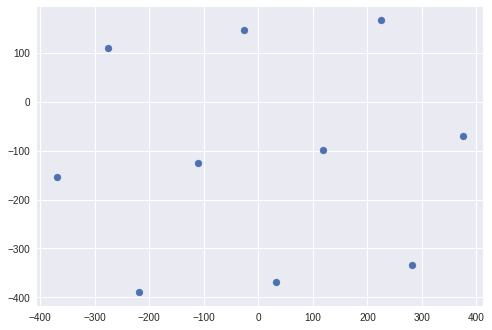

In [0]:
import matplotlib.pyplot as plt

plt.scatter(x, y)

In [0]:
import csv
import os

from keras import applications
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
import numpy as np
import pandas

Using TensorFlow backend.


In [0]:
#Xception_model = applications.xception.Xception(weights='imagenet', include_top=False, pooling='avg')

VGG16_model = applications.vgg16.VGG16(weights='imagenet', include_top=False, pooling='avg')

VGG19_model = applications.vgg19.VGG19(weights='imagenet', include_top=False, pooling='avg')

InceptionV3_model = applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, pooling='avg')

#MobileNet_model = applications.mobilenet.MobileNet(weights='imagenet', include_top=False, pooling='avg')

ResNet50_model = applications.resnet50.ResNet50(weights='imagenet', include_top=False, pooling='avg')

models = {'VGG16_model' : VGG16_model,
          'VGG19_model' : VGG19_model,
          'InceptionV3_model' : InceptionV3_model,
          'ResNet50_model' : ResNet50_model
         }

Instructions for updating:
Colocations handled automatically by placer.
94658560/94653016 [==============================] - 7s 0us/step


In [0]:
source = "image_name.tsv"
source_dir = os.path.dirname(source)


def get_feature(metadata, model_name):
    print(metadata['id'], end = " ")
    
    model = models[model_name]
        
    img_path = os.path.join(source_dir, 'images', metadata['image'])
    
    #print(img_path)
    #print('is file: {}'.format(img_path))
    
    img = image.load_img(img_path, target_size=(800, 150))
    x = image.img_to_array(img)
    
    # the image is now in an array of shape (3, 224, 224)
    # but we need to expand it to (1, 2, 224, 224) as Keras is expecting a list of images
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)[0]

    features_arr = np.char.mod('%f', features)
    
    if(metadata['id'] == '1'):
        print(features_arr.shape)
    
    return {"id": metadata['id'], "features": ','.join(features_arr)}


def start():
    # read the source file
    data = pandas.read_csv(source, sep='\t')
    
    images = data.T.to_dict().values()
    
    model_names = ["VGG16_model", "VGG19_model", "InceptionV3_model", "ResNet50_model"]
    
    for model_name in model_names:
        
        print("Using model:", model_name)
        features = []
        
        for image in images:
            features.append(get_feature(image, model_name))
        
        print("\n")
        
        # remove empty entries
        features = filter(None, features)

        # write to a tab delimited file
        source_filename = os.path.splitext(source)[0].split(os.sep)[-1]

        with open(os.path.join(source_dir, '{}_features.tsv'.format(model_name)), 'w') as output:
            w = csv.DictWriter(output, fieldnames=['id', 'features'], delimiter='\t', lineterminator='\n')
            w.writeheader()
            w.writerows(features)


if __name__ == '__main__':
    start()

Using model: VGG16_model
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 

Using model: VGG19_model
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 

Using model: InceptionV3_model
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 9

In [0]:
fp = open("image_name.tsv", "w")

fp.write("id\timage\n")

for i in range(1, 107):
    fp.write(str(i) + "\t" + "SP" + str(i) + ".jpg\n")

fp.close()

In [0]:
!cat image_name.tsv

In [0]:
import csv
import os
import sys

import numpy
import pandas
from sklearn import (
    decomposition,
    manifold,
    pipeline,
)


def named_model(name):
    if name == 'TSNE':
        return manifold.TSNE(random_state=0)
    if name == 'PCA-TSNE':
        tsne = manifold.TSNE(
            random_state=0, perplexity=50, early_exaggeration=6.0)
        pca = decomposition.PCA(n_components=48)
        return pipeline.Pipeline([('reduce_dims', pca), ('tsne', tsne)])
    if name == 'PCA':
        return decomposition.PCA(n_components=48)
    raise ValueError('Unknown model')


def process(data, model):
    # split the comma delimited string back into a list of values
    transformed = [d.split(',') for d in data['features']]

    # convert image data to float64 matrix. float64 is need for bh_sne
    x_data = numpy.asarray(transformed).astype('float64')
    x_data = x_data.reshape((x_data.shape[0], -1))

    # perform t-SNE
    vis_data = model.fit_transform(x_data)

    # convert the results into a list of dict
    results = []
    for i in range(0, len(data)):
        results.append({
            'id': data['id'][i],
            'x': vis_data[i][0],
            'y': vis_data[i][1]
        })
    return results


def write_tsv(results, output_tsv):
    # write to a tab delimited file
    with open(output_tsv, 'w') as output:
        w = csv.DictWriter(
            output, fieldnames=['id', 'x', 'y'], delimiter='\t',
            lineterminator='\n')
        w.writeheader()
        w.writerows(results)


def main():
    
    feature_files = ["InceptionV3_model_features.tsv",
                     "ResNet50_model_features.tsv",
                     "VGG16_model_features.tsv",
                     "VGG19_model_features.tsv"]
    
    model = named_model("TSNE")
    
    for feature_file in feature_files:
        # read in the data file
        data = pandas.read_csv(feature_file, sep='\t')
        #print(data.shape)
        
        results = process(data, model)

        destination_dir = os.path.dirname(feature_file)
        #print(destination_dir)
        
        source_filename = os.path.splitext(feature_file)[0].split(os.sep)[-1]
        #print(source_filename)
        
        tsv_name = os.path.join(destination_dir, '{}_tsne.tsv'.format(source_filename))
        #print(tsv_name)

        write_tsv(results, tsv_name)


if __name__ == '__main__':
    main()

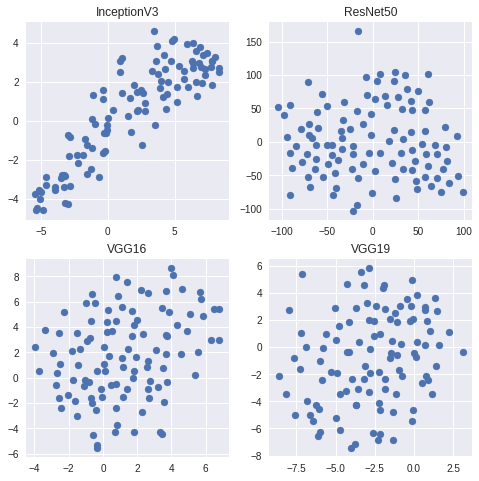

In [0]:
%matplotlib inline

InceptionV3 = pandas.read_csv("InceptionV3_model_features_tsne.tsv", sep = "\t")

ResNet50 = pandas.read_csv("ResNet50_model_features_tsne.tsv", sep = "\t")

VGG16 = pandas.read_csv("VGG16_model_features_tsne.tsv", sep = "\t")

VGG19 = pandas.read_csv("VGG19_model_features_tsne.tsv", sep = "\t")

fig, ax = plt.subplots(2, 2, figsize=(8,8))

#plt.subplot(2, 2, 1)
ax[0, 0].scatter(InceptionV3['x'], InceptionV3['y'])
ax[0, 0].set_title("InceptionV3")
#plt.show()

#plt.subplot(2, 2, 1)
ax[0, 1].scatter(ResNet50['x'], ResNet50['y'])
ax[0, 1].set_title("ResNet50")
#plt.show()

#plt.subplot(2, 2, 1)
ax[1, 0].scatter(VGG16['x'], VGG16['y'])
ax[1, 0].set_title("VGG16")
#plt.show()

#plt.subplot(2, 2, 1)
ax[1, 1].scatter(VGG19['x'], VGG19['y'])
ax[1, 1].set_title("VGG19")
plt.show()

fig.savefig("image_similarity_plot.jpg")

In [0]:
data = pandas.read_csv("ResNet50_model_features.tsv", sep = "\t")


transformed = [d.split(',') for d in data['features']]

# convert image data to float64 matrix. float64 is need for bh_sne
x_data = numpy.asarray(transformed).astype('float32')
print(x_data.shape)

trained = x_data.reshape((x_data.shape[0], -1))
print(x_data.shape)

(106, 2048)
(106, 2048)


In [0]:
test_files = os.listdir("testing/")
#print(test_files)

model = models["ResNet50_model"]


for test in test_files:
        
    img_path = os.path.join('testing', test)
    
    #print(img_path)
    #print('is file: {}'.format(img_path))
    
    img = image.load_img(img_path, target_size=(800, 150))
    x = image.img_to_array(img)
    
    # the image is now in an array of shape (3, 224, 224)
    # but we need to expand it to (1, 2, 224, 224) as Keras is expecting a list of images
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)[0]

    features_arr = np.char.mod('%f', features)
    
    features_arr = numpy.asarray(features_arr).astype('float32')
    
    #print(features_arr)
    #print(trained)
    
    distances = np.sum((features_arr - trained) ** 2, axis = 1)
    min_index = np.argmin(distances)
    max_index = np.argmax(distances)
    
    print(test, min_index, distances[min_index], distances[max_index])

spine7.jpg 61 194.8223 1206.9382
spine8.jpg 62 225.15079 960.17303
spine9.jpg 63 258.24005 1221.5297
spine2.jpg 55 249.37685 1171.3505
spine3.jpg 57 262.68463 1128.9597
spine0.jpg 54 277.59705 1118.1105
spine4.jpg 58 280.1023 1250.0703
spine5.jpg 59 262.77435 1070.6239
spine1.jpg 56 329.64542 1315.5269
spine6.jpg 60 287.44562 1030.3142
